Красненкова Анастасия Владимировна

Соревнование по классификации автомобилей (ник Crazy_Cat)

Кафедра матлога

In [1]:
import keras
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.utils import np_utils
import os
from keras.models import Model
from keras.layers import Dense, Flatten, Input
from keras.layers import Conv2D
 
import matplotlib.pyplot as plt
 

Using TensorFlow backend.


In [2]:
!wget "https://www.dropbox.com/s/h9etwgyit0ip4zw/cvcourse2019carreco.." -O _Projects.zip
#подгружаем архив с данными соревнования, предварительно положив его на Дропбокс

--2019-12-29 12:26:49--  https://www.dropbox.com/s/h9etwgyit0ip4zw/cvcourse2019carreco..
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h9etwgyit0ip4zw/cvcourse2019carreco.. [following]
--2019-12-29 12:26:50--  https://www.dropbox.com/s/raw/h9etwgyit0ip4zw/cvcourse2019carreco..
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce93fbe065664d7cd1cc6324b90.dl.dropboxusercontent.com/cd/0/inline/AvIotpPnHSAfrt5e3KSWYn6hwBwYVU0kQ6mlULqYpklkGxToshpUamOyz6MW3fnIIqwdgo69l_PRRcrrLV64GFZkvuaYXTXe5wVsHTZ9rbcaHGAcuoK4lMNGGOmKhZLrQBU/file# [following]
--2019-12-29 12:26:50--  https://uce93fbe065664d7cd1cc6324b90.dl.dropboxusercontent.com/cd/0/inline/AvIotpPnHSAfrt5e3KSWYn6hwBwYVU0kQ6mlULqYpklkGxToshpUamOyz6MW3fnIIqwdgo69l_PRRcrrLV64GFZ

In [3]:
!unzip _Projects.zip -d MyTask
# распаковываем

Archive:  _Projects.zip
replace MyTask/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
import pandas as pd
master = pd.read_csv('MyTask/train.csv')
master.head()

,image,label
0,000000.jpg,188
1,000001.jpg,85
2,000002.jpg,101
3,000003.jpg,57
4,000004.jpg,31


In [0]:
b = master.sort_values(by = ['label'])

In [0]:
b1 = b.query("label > = 0")

In [7]:
c = b1.label.value_counts()
c

119    101
75      84
166     82
16      79
115     78
      ... 
98      48
141     48
157     47
2       45
129     39
Name: label, Length: 196, dtype: int64

In [8]:
master['stat'] = c
master

,image,label,stat
0,000000.jpg,188,67.0
1,000001.jpg,85,76.0
2,000002.jpg,101,45.0
3,000003.jpg,57,71.0
4,000004.jpg,31,69.0
...,...,...,...
12829,012829.jpg,120,NaN
12830,012830.jpg,7,NaN
12831,012831.jpg,175,NaN
12832,012832.jpg,136,NaN


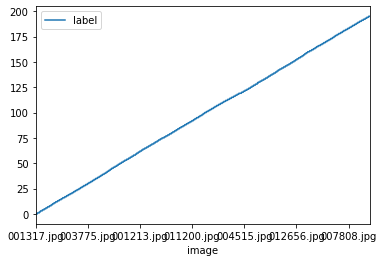

In [9]:
b.plot(x='image', y='label')
plt.show()

In [10]:
b.agg(['mean', 'count'])

,image,label
count,12834.0,12834.000000
mean,NaN,97.739598


In [0]:
# в предыдущих ячейках пыталась понять, насколько сбалансированы данные по классам. Сделала вывод, что вполне сбалансированы

In [0]:
import os
import cv2
import numpy as np

In [0]:
#формирую массив путей для загрузки картинок из Трейна; также формирую массив меток.
#так как пути  картинок загружаются подряд, то метки для них также складываются в массив подряд, по возрастанию их
#порядкового номера в таблице разметки данных Train.csv.
#Таким образом, соответствие картинок и меток сохраняется

img_path = "MyTask/train/train"

y = []
file_paths = []
c = len(master)
f = master['image']
u = master['label']
for i in range(c):
    file_paths.append(img_path +'/'+str(master.loc[i][0]))
    y.append(master.loc[i][1])

y = np.array(y)

In [13]:
y

array([188,  85, 101, ..., 175, 136,   4])

In [0]:
from tqdm import tqdm 
# использую ускоритель загрузки

In [0]:
train_data = []

In [16]:
#считываю картинки, оставляю их цветными (вдруг цвет учитывается в классификации?),
#привожу к размеру 224 на 224, под который заточены большинство нейросетей.
#как уже было замечено выше, картинки загружаются подряд 
for im in tqdm(file_paths):
    img = cv2.imread(im)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    #img = img[16:240, 16:240]
    train_data.append(img)

100%|██████████| 12834/12834 [00:17<00:00, 741.26it/s]


In [0]:
train_data = np.array(train_data)
# преобразую список в массив -- стандартная процедура

In [18]:
print(train_data.shape)

(12834, 224, 224, 3)


In [19]:
# ту же процедуру формирования загрузочных путей и загрузки самих картинок 
# проделываю и для Теста
df_sub = pd.read_csv('MyTask/sample_submission.csv')

img_path = 'MyTask/test/test'

u = len(df_sub['image'])
file_paths1 = []
for i in range(u):
    file_paths1.append(img_path +'/'+str(df_sub.loc[i][0]))
    
file_paths1

['MyTask/test/test/000000.jpg',
 'MyTask/test/test/000001.jpg',
 'MyTask/test/test/000002.jpg',
 'MyTask/test/test/000003.jpg',
 'MyTask/test/test/000004.jpg',
 'MyTask/test/test/000005.jpg',
 'MyTask/test/test/000006.jpg',
 'MyTask/test/test/000007.jpg',
 'MyTask/test/test/000008.jpg',
 'MyTask/test/test/000009.jpg',
 'MyTask/test/test/000010.jpg',
 'MyTask/test/test/000011.jpg',
 'MyTask/test/test/000012.jpg',
 'MyTask/test/test/000013.jpg',
 'MyTask/test/test/000014.jpg',
 'MyTask/test/test/000015.jpg',
 'MyTask/test/test/000016.jpg',
 'MyTask/test/test/000017.jpg',
 'MyTask/test/test/000018.jpg',
 'MyTask/test/test/000019.jpg',
 'MyTask/test/test/000020.jpg',
 'MyTask/test/test/000021.jpg',
 'MyTask/test/test/000022.jpg',
 'MyTask/test/test/000023.jpg',
 'MyTask/test/test/000024.jpg',
 'MyTask/test/test/000025.jpg',
 'MyTask/test/test/000026.jpg',
 'MyTask/test/test/000027.jpg',
 'MyTask/test/test/000028.jpg',
 'MyTask/test/test/000029.jpg',
 'MyTask/test/test/000030.jpg',
 'MyTask

In [20]:
test_data = []
for im in tqdm(file_paths1):
    img = cv2.imread(im)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    #img = img[16:240, 16:240]
    test_data.append(img)

100%|██████████| 3305/3305 [00:04<00:00, 749.16it/s]


In [21]:
test_data = np.array(test_data)
print(test_data.shape)

(3305, 224, 224, 3)


In [22]:
# теперь пишу следующий код: строю валидационную выборку таким образом, чтобы в ней оказались
# представители всех классов. Так как наши  данные более-менее сбалансированы, то от каждого класса считаю возможным
# отщипнуть по 10 представителей на валидацию. Этот подход немного  поднял точность модели 

data_num = len(y)
random_index = np.random.permutation(data_num)



np.set_printoptions(threshold=np.inf)
info = master.groupby('label').count() # Индексы следующих элементов

x_train = []
y_train = []
x_test = []
y_test = []

next_label = info['image'][0]
#next_label = next_label+info['image'][1]
#next_label = next_label+info['image'][2]
#print(next_label)
#print(y[next_label])

count = len(y)

j = 0
for i in range(count):
    if i < next_label-10:
        x_train.append(train_data[i])
        y_train.append(y[i])
    elif i < next_label:
        x_test.append(train_data[i])
        y_test.append(y[i])
    else:
        next_label = next_label+info['image'][j]
        j+=1
        x_train.append(train_data[i])
        y_train.append(y[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)
print(len(y_test))
print(y_train[0])
print(y_train[1])
 
Y_train = np_utils.to_categorical(y_train, 196)
Y_test = np_utils.to_categorical(y_test, 196)

print('x_train', x_train.shape)
print('x_test', x_test.shape)

1959
188
85
x_train (10875, 224, 224, 3)
x_test (1959, 224, 224, 3)


In [0]:
# привожу тренировочные и валидационные данные к стандартному нормализованному виду
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [24]:
batch_size = 32
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
# строю модель
base_model=keras.applications.ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3), pooling='avg')



x = base_model.output


predictions = Dense(196, activation="softmax")(x)

model = Model(inputs = base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy',
optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True),
metrics=['accuracy'])

# Замораживаю только первый слой нашей модели! Т.к. он одновременно и последний несверточный слой
# в предобученной модели Resnet50, к тому же, единственный несверточный :)

model.layers[0].trainable = False


# провожу аугментацию тренировочных и валидационных данных, изготавливая дата-генераторы (применяют повороты, растяжения и т.п.)

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(x_train)

test_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
test_datagen.fit(x_test)
# обучаю модель при помощи дата-генераторов
model.fit_generator(
train_datagen.flow(x_train, Y_train, batch_size=32),
steps_per_epoch= 339,
epochs= 70,
verbose=1,
validation_data = train_datagen.flow(x_test, Y_test, batch_size=32))
















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/70
339/339 [==============================] - 128s 377ms/step - loss: 5.5301 - acc: 0.0045 - val_loss: 5.3975 - val_acc: 0.0061
Epoch 2/70
339/339 [==============================] - 116s 342ms/step - loss: 5.3088 - acc: 0.0103 - val_loss: 5.2457 - val_acc: 0.0138
Epoch 3/70
339/339 [==============================] - 117s 344ms/step - loss: 5.1188 - acc: 0.0276 - val_loss: 5.1005 - val_acc: 0.0245
Epoch 4/70
339/339 [==============================] - 117s 345ms/step - loss: 4.9337 - acc: 0.0444 - val_loss: 4.8884 - val_acc: 0.0485
Epoch 5/70
339/339 [==============================] - 116s 341ms/step - loss: 4.7037 - acc: 0.0753 - val_loss: 4.6660 - val_acc: 0.0750
Epoch 6/70
339/339 [==============================] - 116s 343ms/step - loss: 4.4571 - acc: 0.1170 - val_loss: 4.4040 - val_acc: 0.1103
Epoch 7/70
339/339 [==============================] - 115s 340ms/step - l

In [0]:
test_images = test_data.astype('float32')
test_images /= 255

In [0]:
predictions = model.predict(test_images) #делаю предсказания

In [27]:
y_validation_predict = np.argmax(predictions, axis=1) # перевожу предсказания в числовые метки
c = len(y_validation_predict)
c

3305

In [0]:
df_sub = pd.read_csv('MyTask/sample_submission.csv') # записываю их в файлик

df_sub['label'] = y_validation_predict
df_sub.head()

df_sub.to_csv('pred.csv', index=False)